<a href="https://colab.research.google.com/github/toni-ramchandani/AI-Powered-Web-Search-Assistant/blob/main/Section2_3_Machine%20Learning%20Fundamentals_Reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

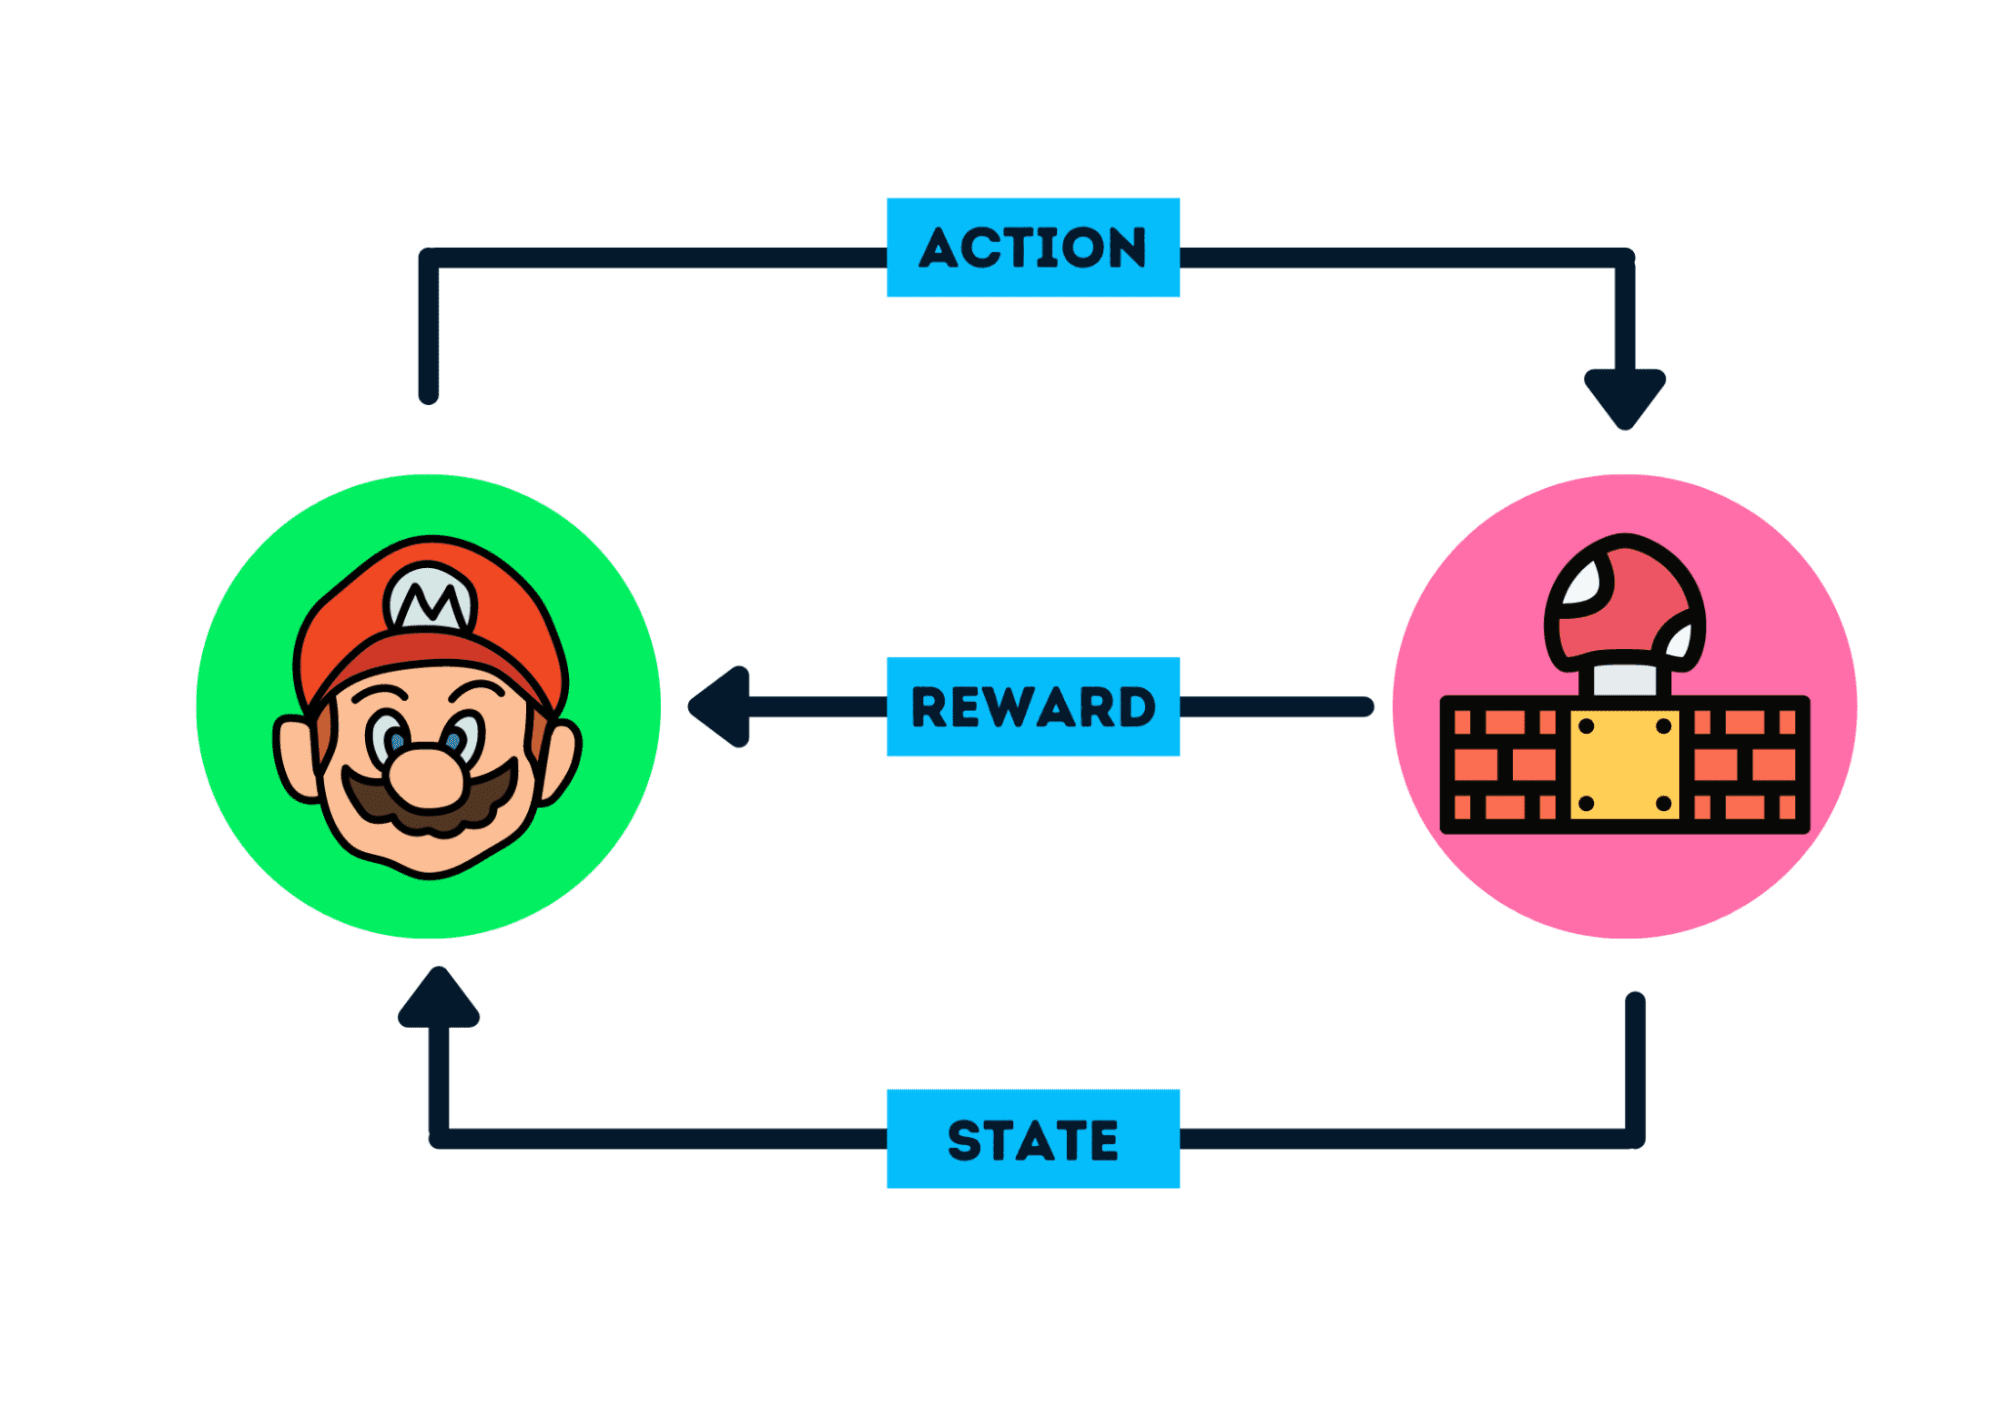

### Reinforcement Learning

Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by performing certain actions in an environment to maximize some notion of cumulative reward. Unlike supervised learning, which requires labeled input-output pairs, reinforcement learning is based on the agent's interaction with the environment and the rewards it receives.

#### Core Concepts of Reinforcement Learning

1. **Agent**: The learner or decision maker that interacts with the environment to achieve a goal.

2. **Environment**: The external system that the agent interacts with. It provides feedback to the agent in the form of rewards or punishments.

3. **State (s)**: A representation of the current situation of the agent in the environment.

4. **Action (a)**: The set of all possible moves the agent can make.

5. **Reward (r)**: The immediate return sent back from the environment to evaluate the last action performed by the agent.

6. **Policy (π)**: The strategy that the agent employs to determine the next action based on the current state. It can be deterministic or stochastic.

7. **Value Function (V)**: A function that estimates the expected return (reward) from a state, under a specific policy.

8. **Q-Value (Q)**: A function that estimates the expected return of taking an action in a given state, under a specific policy.

#### Types of Reinforcement Learning

1. **Model-Free RL**:
   - The agent learns to act directly from experiences without understanding the environment's dynamics.
   - Examples include Q-learning and Policy Gradient methods.

2. **Model-Based RL**:
   - The agent tries to understand the environment's dynamics and uses this model to make decisions.
   - Examples include Dyna-Q and AlphaZero.

#### Algorithms in Reinforcement Learning

1. **Q-Learning**:
   - A model-free algorithm that learns the value of an action in a particular state.
   - Updates Q-values using the Bellman equation.
   - Off-policy learning: learns the value of the optimal policy independently of the agent’s actions.

2. **Deep Q-Networks (DQN)**:
   - An extension of Q-learning that uses deep neural networks to approximate Q-values.
   - Incorporates experience replay and target networks to stabilize training.

3. **Policy Gradient Methods**:
   - Directly parameterize the policy and optimize the parameters using gradient ascent.
   - Suitable for high-dimensional action spaces and continuous action spaces.

4. **Actor-Critic Methods**:
   - Combine value-based and policy-based methods.
   - The actor updates the policy, while the critic evaluates the action by estimating value functions.

#### Steps in Reinforcement Learning

1. **Initialization**:
   - Initialize the environment and the agent.
   - Define the state space, action space, and reward structure.

2. **Interaction**:
   - The agent interacts with the environment by taking actions.
   - The environment responds with a new state and reward.

3. **Learning**:
   - The agent updates its knowledge (Q-values or policy parameters) based on the received reward and observed transition.

4. **Evaluation**:
   - Assess the agent’s performance by evaluating the cumulative reward over time.
   - Fine-tune the hyperparameters and strategies based on performance.

#### Applications of Reinforcement Learning

1. **Gaming**:
   - Training AI to play games like Chess, Go, and video games (e.g., AlphaGo, OpenAI Five).

2. **Robotics**:
   - Autonomous control of robots for navigation, manipulation, and task execution.

3. **Finance**:
   - Algorithmic trading, portfolio management, and risk management.

4. **Healthcare**:
   - Personalized treatment plans, drug discovery, and optimizing clinical trials.

5. **Natural Language Processing**:
   - Text summarization, dialogue systems, and machine translation.

6. **Autonomous Vehicles**:
   - Self-driving cars and UAV navigation.

#### Challenges in Reinforcement Learning

1. **Exploration vs. Exploitation**:
   - Balancing the need to explore new actions to discover their rewards and exploiting known actions that yield high rewards.

2. **Scalability**:
   - Handling large state and action spaces, especially in real-world applications.

3. **Sample Efficiency**:
   - Improving the learning speed with fewer interactions with the environment.

4. **Reward Shaping**:
   - Designing a reward structure that encourages the desired behavior without leading to unintended consequences.

5. **Stability and Convergence**:
   - Ensuring stable learning and convergence of the learning process.

#### Practical Implementation: Q-Learning Example

Here’s a simple implementation of the Q-Learning algorithm in Python. We'll use the OpenAI Gym library to create and interact with an environment.


Reinforcement Learning is a powerful paradigm for training agents to make decisions in dynamic and complex environments. It leverages trial and error, exploration and exploitation, and learns from feedback in the form of rewards. With applications ranging from gaming to robotics and finance, RL represents a versatile and growing area of machine learning. Understanding the core concepts, algorithms, and challenges in RL is crucial for leveraging its full potential.

In [ ]:
!pip install gym

In [ ]:
import gym
import numpy as np

# Create the environment
env = gym.make('FrozenLake-v1')

# Initialize Q-table with zeros
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Set hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995
epsilon_min = 0.01
num_episodes = 10000

# Training the agent
for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore: select a random action
        else:
            action = np.argmax(q_table[state])  # Exploit: select the action with max Q-value

        next_state, reward, done, _ = env.step(action)

        # Update Q-value
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

        state = next_state

    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

print("Training finished.\n")

# Evaluating the agent
total_reward = 0
for _ in range(100):
    state = env.reset()
    done = False
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _ = env.step(action)
        total_reward += reward

print(f"Average reward over 100 episodes: {total_reward / 100}")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Training finished.

Average reward over 100 episodes: 0.72
